**Blog Post 1: Classifying Palmer Penguins**

Abstract:

This post seeks to identify what qualitative and quantative features we should select to achieve a 100% accuracy rate using a machine learning model (specifically a logistic regression model) to predict a penguin's species. We exhaustively test combinations of available features to find the combination that leads to the highest accuracy on training data. The features found to lead to a model with 100% accuracy on the test dataset were the island a penguin was on, the penguins' culmen length, and their culmen depth.

*I have neither given nor received unauthorized aid on this assignment - James Ohr*


In [157]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [158]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


The below code preprocesses the data: it assigns a unique numerical value to each unique category in the "Species" column, removes variables that are not of interest, removes observations where the value for "Sex" is ".", and removes any observations with missing variable values.

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,0,1,0,1,0,1,1,0
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,0,1,0,1,0,1,0,1
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,1,0,0,1,0,1,0,1
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,1,0,0,1,0,1,1,0
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,0,1,0,1,0,1,0,1


In [173]:
import seaborn as sns
#Creates a table showing means by island
train.groupby(["Island", "Species"]).aggregate('mean')

C:\Users\james\AppData\Local\Temp\ipykernel_33480\3605326083.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby(["Island", "Species"]).aggregate('mean')


Sample Number  \
Island    Species                                                    
Biscoe    Adelie Penguin (Pygoscelis adeliae)            66.030303   
          Gentoo penguin (Pygoscelis papua)              60.244898   
Dream     Adelie Penguin (Pygoscelis adeliae)            90.622222   
          Chinstrap penguin (Pygoscelis antarctica)      35.631579   
Torgersen Adelie Penguin (Pygoscelis adeliae)            67.547619   

                                                     Culmen Length (mm)  \
Island    Species                                                         
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 38.845455   
          Gentoo penguin (Pygoscelis papua)                   47.073196   
Dream     Adelie Penguin (Pygoscelis adeliae)                 38.826667   
          Chinstrap penguin (Pygoscelis antarctica)           48.826316   
Torgersen Adelie Penguin (Pygoscelis adeliae)                 39.229268   

                                                     Culmen Depth (mm)  \
Island    Species                                                        
Biscoe    Adelie Penguin (Pygoscelis adeliae)                18.475758   
          Gentoo penguin (Pygoscelis papua)                  14.914433   
Dream     Adelie Penguin (Pygoscelis adeliae)                18.306667   
          Chinstrap penguin (Pygoscelis antarctica)          18.366667   
Torgersen Adelie Penguin (Pygoscelis adeliae)                18.468293   

                                                     Flipper Length (mm)  \
Island    Species                                                          
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 188.636364   
          Gentoo penguin (Pygoscelis papua)                   216.752577   
Dream     Adelie Penguin (Pygoscelis adeliae)                 190.133333   
          Chinstrap penguin (Pygoscelis antarctica)           196.000000   
Torgersen Adelie Penguin (Pygoscelis adeliae)                 191.195122   

                                                     Body Mass (g)  \
Island    Species                                                    
Biscoe    Adelie Penguin (Pygoscelis adeliae)          3711.363636   
          Gentoo penguin (Pygoscelis papua)            5039.948454   
Dream     Adelie Penguin (Pygoscelis adeliae)          3728.888889   
          Chinstrap penguin (Pygoscelis antarctica)    3743.421053   
Torgersen Adelie Penguin (Pygoscelis adeliae)          3712.804878   

                                                     Delta 15 N (o/oo)  \
Island    Species                                                        
Biscoe    Adelie Penguin (Pygoscelis adeliae)                 8.788643   
          Gentoo penguin (Pygoscelis papua)                   8.247341   
Dream     Adelie Penguin (Pygoscelis adeliae)                 8.933945   
          Chinstrap penguin (Pygoscelis antarctica)           9.331004   
Torgersen Adelie Penguin (Pygoscelis adeliae)                 8.846768   

                                                     Delta 13 C (o/oo)  
Island    Species                                                       
Biscoe    Adelie Penguin (Pygoscelis adeliae)               -25.920138  
          Gentoo penguin (Pygoscelis papua)                 -26.149389  
Dream     Adelie Penguin (Pygoscelis adeliae)               -25.769529  
          Chinstrap penguin (Pygoscelis antarctica)         -24.553401  
Torgersen Adelie Penguin (Pygoscelis adeliae)               -25.715095

The above table shows that each island has a different combination of penguin species. It's worth nothing that within each island, the different penguin species seem to have notable differences in culmen length and flipper length. The only island on which body mass and culmen depth distinguish its two species of resident penguins is Biscoe.

<Axes: xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

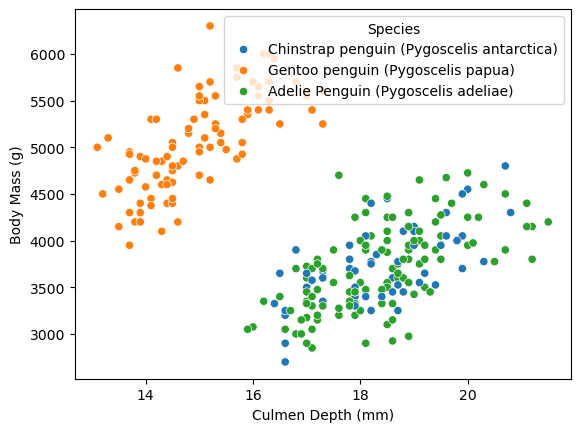

In [161]:
#Creates a scatterplot whose axes are culmen depth and body mass, with points colored by species
sns.scatterplot(data=train, x="Culmen Depth (mm)", y="Body Mass (g)", hue="Species")

The above figure shows that there's a clear divide between Gentoo penguins and the other two penguin species in body mass--Gentoo penguins are heavier regardless of culmen depth. But controlling for the species, there's a clear positive linear relationship between body mass and culmen depth. Adelie and Chinstrap penguins seem to have the same linear relationship between body mass and culmen depth.

<Axes: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

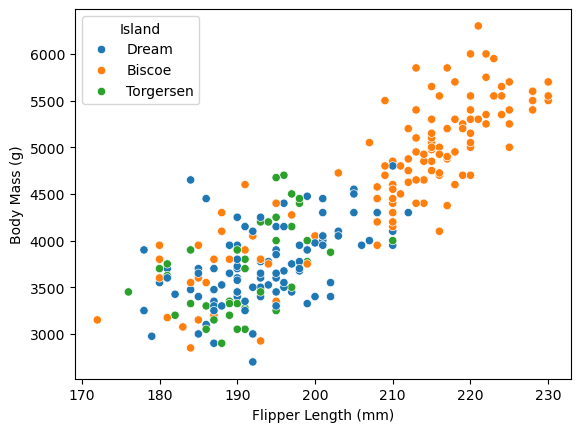

In [162]:
#Creates a scatterplot whose axes are flipper length and body mass, with points colored by island
sns.scatterplot(data=train, x="Flipper Length (mm)", y="Body Mass (g)", hue="Island")

The above figure shows that regardless of the island a penguin is from, there's a linear relationship between body mass and flipper length. But while penguins on Biscoe seem to have a greater range of body mass and flipper length, whereas penguins on Dream and Torgersen occupy a similar, tighter range. 

**Training the Model**

Now we choose three features of the data to achieve 100% testing accuracy. To do so, we use a nested for-loop to construct every possible combination of 1 qualitative feature and 2 quantitative features to use in training a logistic regression model. The outer for-loop sets a qualitative variable to use. The inner for-loop take a pair of quantitative variables from the all_quant_cols array. 

Included in the inner loop is an if-statement that ensures we keep track of the features that lead to the highest score. Those features are stored in the best_cols variable.

In [163]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
best_cols = [] #keeps track of the best features to use
max_score = 0 #keeps track of highest score so far

all_qual_cols = ['Clutch Completion', 'Island']
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
LR = LogisticRegression(max_iter=10000)
for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair)
    LR.fit(X_train[cols], y_train)
    print(cols)
    print(LR.score(X_train[cols], y_train))
    if LR.score(X_train[cols], y_train) > max_score:
      max_score = LR.score(X_train[cols], y_train)
      best_cols = cols

LR.fit(X_train[best_cols], y_train)

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.96484375
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
0.95703125
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Body Mass (g)']
0.9453125
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
0.81640625
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Body Mass (g)']
0.76953125
['Clutch Completion_No', 'Clutch Completion_Yes', 'Flipper Length (mm)', 'Body Mass (g)']
0.63671875
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)']
0.99609375
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Flipper Length (mm)']
0.9765625
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Body Mass (g)']
0.9765625
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Dept

LogisticRegression(max_iter=10000)

**Cross-Validation**

The below code uses a scikit-learn method to calculate cross-validation scores with five folds. The results are largely promising, with the lowest accuracy rate being 96%.

In [164]:
from sklearn.model_selection import cross_val_score

cv_scores_LR = cross_val_score(LR, X_train[best_cols], y_train, cv=5)
cv_scores_LR

array([0.98076923, 1.        , 1.        , 0.96078431, 1.        ])

**Testing**

The below code loads test.csv, preprocesses the data with prepare_data, and scores the LR on the test data. The result is 100% accuracy.

In [165]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[best_cols], y_test)

1.0

**Decision Regions**

In [167]:
#This section of code retrains the model on cols, which has the same features as best_col, just
#with the columns rearranged so that Matplotlib doesn't return an error later in the next code block.

cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
LR = LogisticRegression(max_iter=10000)
LR.fit(X_train[cols], y_train)


LogisticRegression(max_iter=10000)

The below code defines a function, plot_regions, that creates multiple charts (the # is determined by how many qualitative variables there are), each with the same axes. The colors of different regions correspond to the species predictions made by the model, whereas the colors of observations correspond to actual species values.

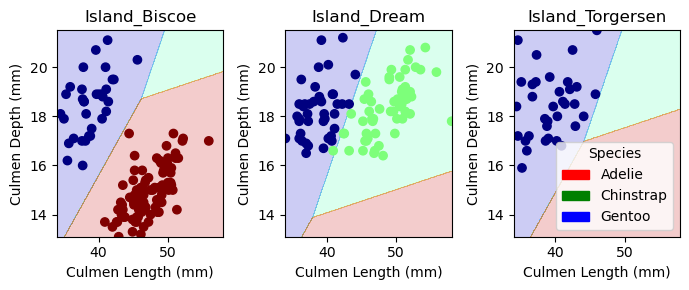

In [168]:
from matplotlib import pyplot as plt
import numpy as np

from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # Creates a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

plot_regions(LR, X_train[cols], y_train)

Above are the decision regions for the training data. We effectively control for the island a penguin is from to determine their species based on their culmen depth and length. The only inaccurately labeled point is a penguin on Dream with a slightly shorter culmen than its depth and would predict. 

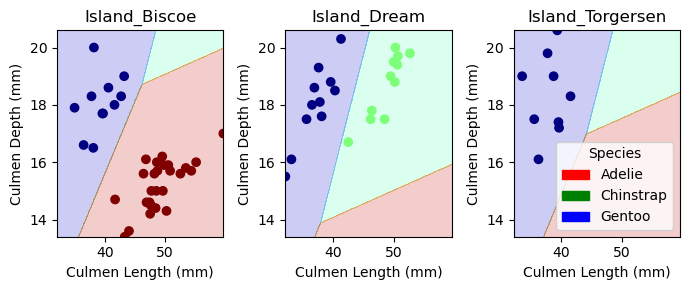

In [169]:
plot_regions(LR, X_test[cols], y_test)

Our 100% accuracy is reflected here--every plotted observation is correctly categorized into the region with the corresponding color.

**Confusion Matrix**

Below is code to create a confusion matrix for our results. Given that there were no false positives or false negatives, we see a confusion matrix with non-zeros only on the diagonal.

In [171]:
from sklearn.metrics import confusion_matrix

y_test_pred = LR.predict(X_test[cols])
C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]], dtype=int64)

**Discussion**

In this post, we found that, with a logistic regression model, the qualitative feature "Island" combined with culmen depth and culmen length can predict with great accuracy (100% accuracy on our test data) whether the penguin is of the Adelie, Chinstrap, or Gentoo species. 

The original figures I created earlier in the post actually weren't helpful in finding the best features. The body mass and flipper length relationship in particular was something that intuitively seemed right to me, but it wasn't actually useful in helping predict penguin species.

Through this blog post, I've learned some basic features of scikit-learn, seaborn, Pandas, and Matplotlib. I'm not sure if I'm just not sufficiently comfortable with Matplotlib, but it gave me more trouble than the rest of the entire project. I had to re-train the model on a re-arranged set of column names (instead of best_cols) just to get it to stop giving me the same error. The most valuable aspect of it, I think, was just getting a better hang of the syntax and gaining familiarity with the tools we use in the class, especially scikit-learn.